# **Medical Insurance Charge Study**

## Objectives

* Answer business requirements 1:
  * The client wants to understand the factors that influence medical insurance charges, so they can learn the most relevant factors and how they affect the charges.

## Inputs

* output/datasets/colletion/medical_insurance_charges.csv

## Outputs

* EDA Report: Generate reports to summarize data distributions, correlations, and initial findings.
* Visualizations that illustrate the relationships between the variables and the medical insurance charges, such as scatter plots, box plots, and histograms. 

## Additional Comments

* This is the first step in the analysis, focusing on exploratory data analysis (EDA) to understand the dataset and identify key factors influencing medical insurance charges.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/medical-insurance-prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/medical-insurance-prediction'

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv('outputs/datasets/collection/insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


---

# Understand the dataset

In [5]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

Let's see how charges are distributed according to the different variables in the dataset.

Text(0.5, 1.0, 'Distribution of Charges')

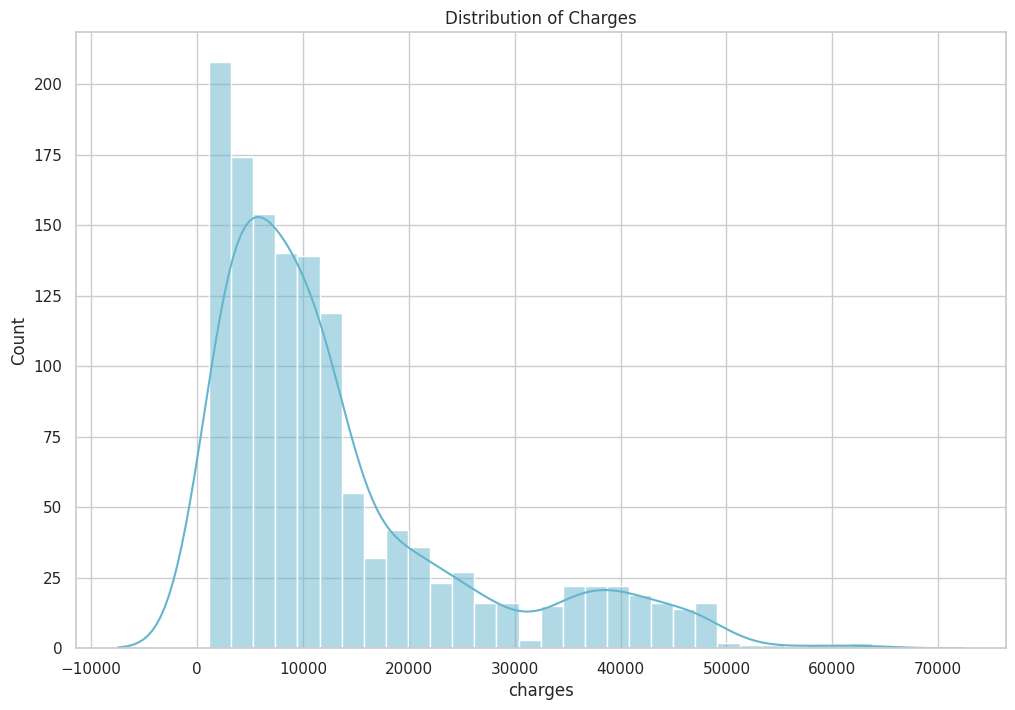

In [6]:
sns.set_theme(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['charges'], kde = True, color = 'c', kde_kws=dict(cut=3))
plt.title('Distribution of Charges')

Text(0, 0.5, 'Charges')

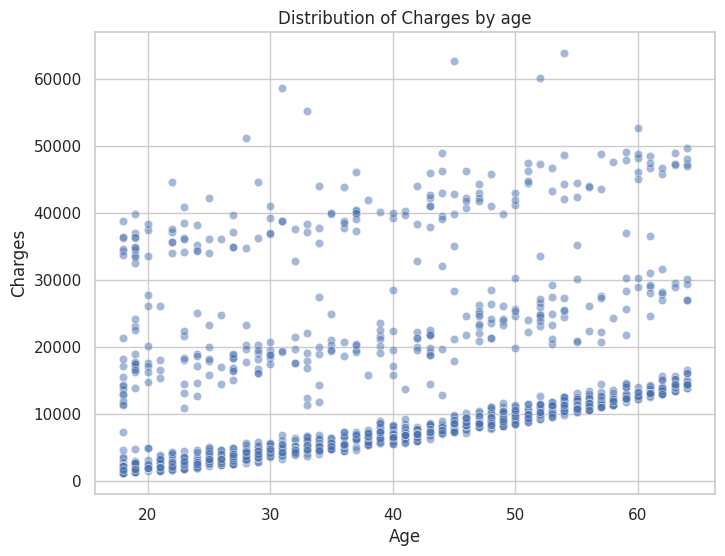

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges', alpha=0.5)
plt.title('Distribution of Charges by age')
plt.xlabel('Age')
plt.ylabel('Charges')


sex
male      676
female    662
Name: count, dtype: int64

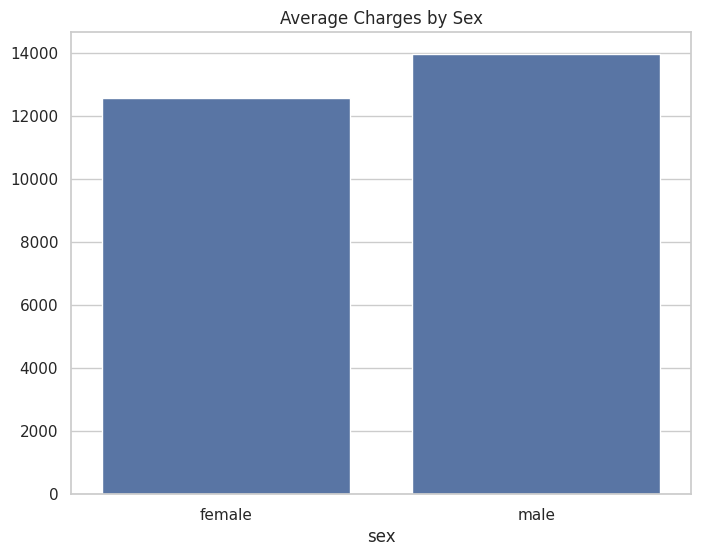

In [8]:
charges = df['charges'].groupby(df['sex']).mean()
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.barplot(x=charges.index, y=charges.values)
plt.title('Average Charges by Sex')

df['sex'].value_counts()

Text(0, 0.5, 'Charges')

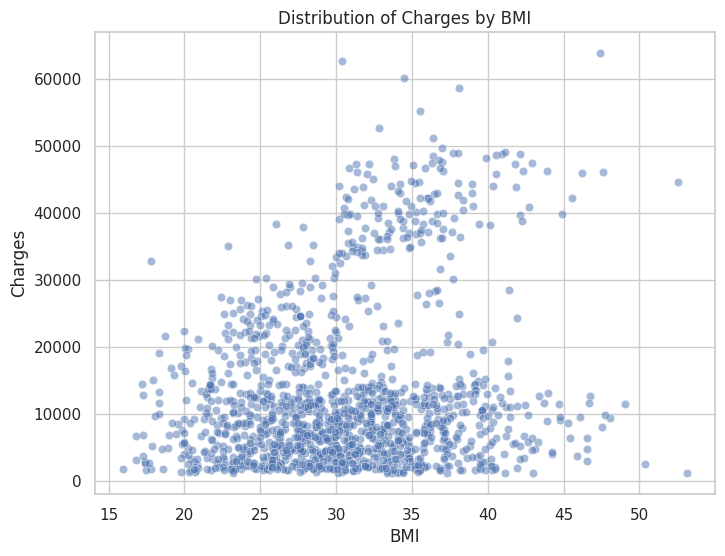

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', alpha=0.5)
plt.title('Distribution of Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

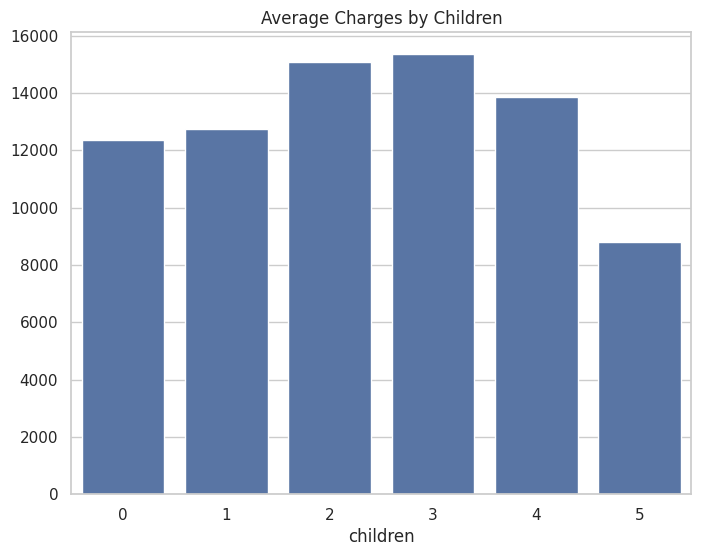

In [10]:
charges = df['charges'].groupby(df['children']).mean()
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.barplot(x=charges.index, y=charges.values)
plt.title('Average Charges by Children')

df['children'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

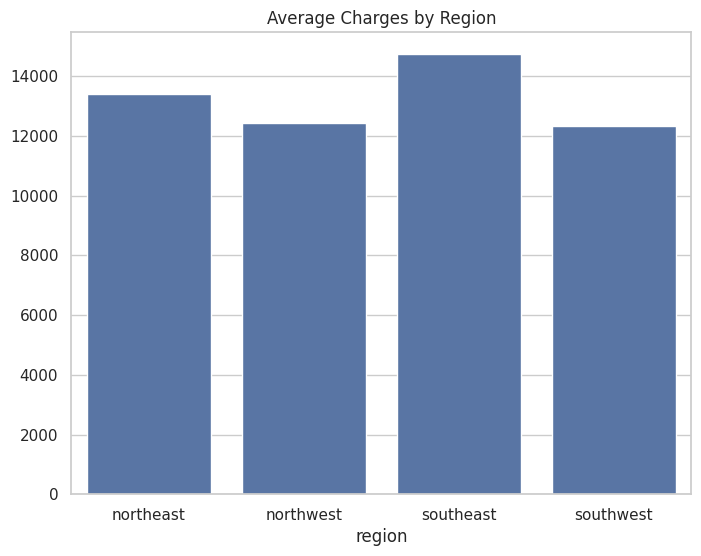

In [11]:
charges = df['charges'].groupby(df['region']).mean()
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.barplot(x=charges.index, y=charges.values)
plt.title('Average Charges by Region')

df['region'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

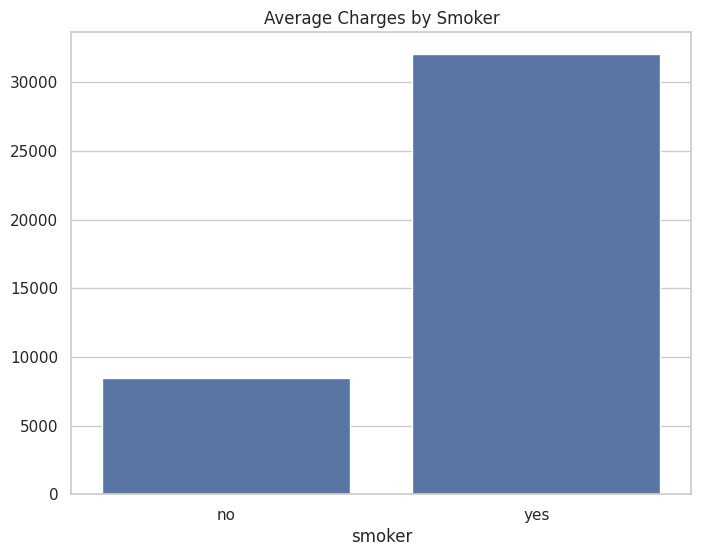

In [12]:
charges = df['charges'].groupby(df['smoker']).mean()
f, ax = plt.subplots(1,1, figsize=(8, 6))
ax = sns.barplot(x=charges.index, y=charges.values)
plt.title('Average Charges by Smoker')

df['smoker'].value_counts()

---

# Correlation Analysis

Correlation measures the strength and direction of a linear relationship between two numerical variables.
* Values range from -1 to 1.
    * +1: Strong positive correlation (e.g., as age increases, charges increase).
    * -1: Strong negative correlation.
    * 0: No correlation.

We’ll use Pearson correlation



Correlation with Charges:
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


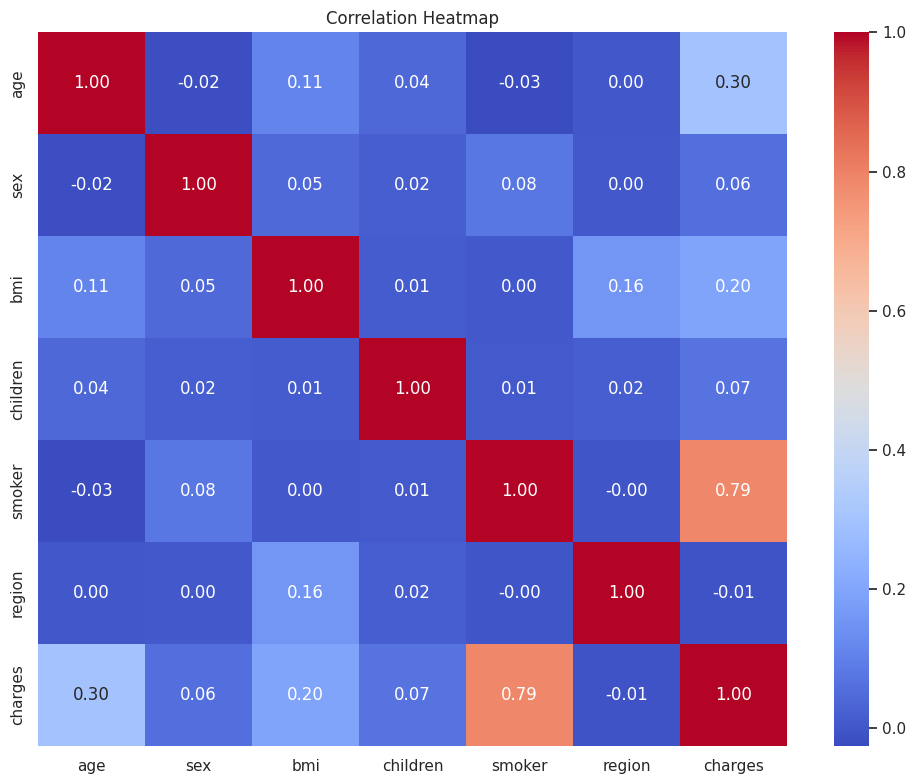

In [13]:
# Convert categorical variables to numeric to compute correlation
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded['region'] = df_encoded['region'].astype('category').cat.codes

# Correlation matrix
correlation = df_encoded.corr()

print("Correlation with Charges:")
print(correlation['charges'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Conclusions and Next Steps
## Conclusions

* Smoker status is the strongest driver of high insurance charges
    *  Both correlation analysis and visualizations (boxplots, scatterplots) clearly show that smokers have significantly higher charges.
    * Pearson correlation between smoker and charges is very high (~0.79), confirming this is a critical risk factor.
* Age positively influences insurance costs
    * Correlation of ~0.3 indicates a moderate positive relationship.
    * Boxplots show that older age groups tend to have higher charges.
* BMI influences charges
    * Correlation of ~0.2 suggests a weak positive relationship.
    * Boxplots show that higher BMI groups tend to have higher charges, but the effect is less pronounced than age or smoking status
* Number of children, region, and sex have little to no impact on charges
    * These features showed weak or near-zero correlation with charges.
    * Their visual distributions (boxplots) confirmed a minimal effect, suggesting they might not add much predictive value to a model.
  
## Next Steps

* Feature Engineering
* Data Preprocessing
* Model Development
* Model Evaluation

---